In [1]:
import pandas as pd
import numpy as np
from scipy import stats, integrate, interpolate
import matplotlib.pyplot as plt

df = pd.read_csv("players_stats_by_season_full_details.csv")

df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


In [2]:
df.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school', 'draft_round', 'draft_pick', 'draft_team'],
      dtype='object')

In [3]:
regular = df[(df["League"] == "NBA") & (df["Stage"] == "Regular_Season")].copy()

regular.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


In [6]:
seasons_count = regular.groupby("Player")["Season"].nunique().sort_values(ascending=False)

top_player = seasons_count.index[0]
top_player, seasons_count.iloc[0]

('Vince Carter', 19)

In [7]:
player_df = regular[regular["Player"] == top_player].copy()

player_df["3P_pct"] = player_df["3PM"] / player_df["3PA"]

player_df = player_df.dropna(subset=["3P_pct"])

player_df[["Season", "3PM", "3PA", "3P_pct"]].sort_values("Season")

,Season,3PM,3PA,3P_pct
1,1999 - 2000,95,236,0.402542
509,2000 - 2001,162,397,0.408060
1047,2001 - 2002,121,313,0.386581
2761,2003 - 2004,93,243,0.382716
4114,2004 - 2005,127,313,0.405751
5333,2005 - 2006,125,367,0.340599
6548,2006 - 2007,156,437,0.356979
7961,2007 - 2008,98,273,0.358974
9267,2008 - 2009,151,392,0.385204
10608,2009 - 2010,119,324,0.367284


In [8]:
player_df["Year"] = player_df["Season"].str[:4].astype(int)

x = player_df["Year"].to_numpy()
y = player_df["3P_pct"].to_numpy()

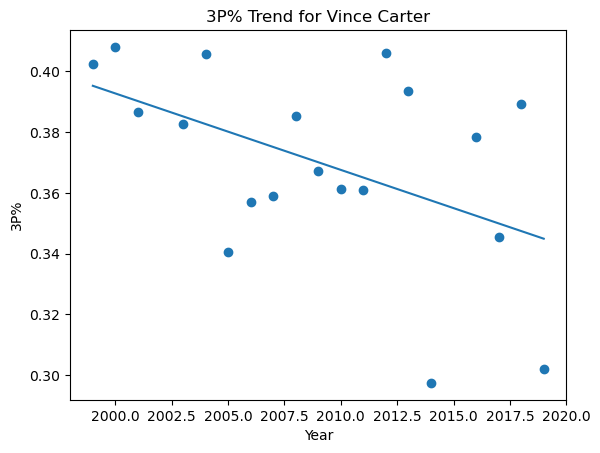

In [9]:
from scipy import stats

slope, intercept, r, p, se = stats.linregress(x, y)

plt.scatter(x, y)
plt.plot(x, slope*x + intercept)
plt.title(f"3P% Trend for {top_player}")
plt.xlabel("Year")
plt.ylabel("3P%")
plt.show()

In [10]:
from scipy import integrate

a = x.min()
b = x.max()

def fit_line(t):
    return slope*t + intercept

area, _ = integrate.quad(fit_line, a, b)

avg_fit = area / (b - a)
avg_actual = y.mean()

avg_fit, avg_actual

(0.3700826101829928, 0.3699501146202911)

In [ ]:
Using linear interpolation, the estimated three-point percentage for the 2002 season is approximately 0.3846, and for the 2015 season is approximately 0.3379. These values were calculated using linear interpolation between surrounding seasons.

In [11]:
from scipy import interpolate

interp_func = interpolate.interp1d(x, y, kind="linear", fill_value="extrapolate")

missing_years = np.array([2002, 2015])

estimated_values = interp_func(missing_years)

missing_years, estimated_values

(array([2002, 2015]), array([0.38464876, 0.33789609]))

In [12]:
FGM = regular["FGM"].dropna().to_numpy()
FGA = regular["FGA"].dropna().to_numpy()

stats_summary = {
    "FGM_mean": np.mean(FGM),
    "FGM_variance": np.var(FGM, ddof=1),
    "FGM_skew": stats.skew(FGM),
    "FGM_kurtosis": stats.kurtosis(FGM),
    "FGA_mean": np.mean(FGA),
    "FGA_variance": np.var(FGA, ddof=1),
    "FGA_skew": stats.skew(FGA),
    "FGA_kurtosis": stats.kurtosis(FGA)
}

stats_summary

{'FGM_mean': 311.48411335337056,
 'FGM_variance': 25944.084458747722,
 'FGM_skew': 0.7667086899377351,
 'FGM_kurtosis': 0.14829946557596152,
 'FGA_mean': 679.8619579218549,
 'FGA_variance': 118066.75117864372,
 'FGA_skew': 0.7329060864100085,
 'FGA_kurtosis': 0.11910565048103505}

In [ ]:
The mean of FGA (679.86) is much higher than the mean of FGM (311.48), which makes sense because players attempt more shots than they make.
The variance of FGA is also much larger than FGM, showing greater spread in shot attempts.
Both distributions have positive skew, meaning there are some players with very high values.
The kurtosis values are close to zero, which suggests the distributions are close to normal.

In [13]:
paired_df = regular.dropna(subset=["FGM", "FGA"])

t_rel, p_rel = stats.ttest_rel(paired_df["FGM"], paired_df["FGA"])

t_ind, p_ind = stats.ttest_ind(FGM, FGA, equal_var=False)

t_rel, p_rel, t_ind, p_ind

(-133.0069641490044, 0.0, -66.25149141798289, 0.0)